<a href="https://colab.research.google.com/github/rlagksqls17/from_R_to_python/blob/main/%ED%8C%A8%ED%82%A4%EC%A7%80%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지를 활용한 전처리  

* 실무에서 데이터 분석 시, 모형 생성 과정보다 데이터 수집과 전처리, 탐색에 훨씬 더 많은 시간과 노력이 소요된다.  

* R에서는 이러한 데이터 전처리를 쉽고 빠르게 적용할 수 있는 유용한 패키지를 지원한다. 

## (R) - plyr  

* 이 패키지의 함수들은 데이터를 분할한 뒤 원하는 방향으로 특정함수를 적용하고, 그 결과를 재조합하여 반환해준다.  

* Split -> Apply -> Recombination  

* plyr 패키지의 함수 대부분은 '**ply' 평태로 이루어지며,  
첫 번째 글자는 입력 데이터의 형태를,  
두 번째 글자는 출력 데이터의 형태를 의미한다.  

> a : array (배열)  
l : list (리스트)  
d : data frame (데이터프레임)  
_ : 아무런 출력을 하지 않음  

### 1. adply  

배열을 입력받아 함수를 적용한 후 데이터 프레임으로 반환해 줌  

* 굳이 배열이 아니더라도 행렬과 데이터프레임을 입력 데이터로 사용 가능   

Q1. R의 iris 데이터에서 Petal.Length 변수가 1.5 미만이면서 Species 변수 값이 'setosa'인 조건을 만족하는 경우 '1'을 출력하고,  
그렇지 않은 경우 '0'을 부여한 칼럼을 생성하여, 원래의 iris 데이터와 함께 데이터 프레임 형태로 출력해보자.  

```  
> library(plyr)
> #변수명을 지정하지 않고 adply를 이용해 연산 
> adply(iris, 1,
+ function(row){ifelse(row$Petal.Length<1.5 & row$Species == "setosa", "1", "0")})
```  

```  
# 변수명을 따로 지정하여 데이터프레임으로 전환  
> adply(iris, 1, 
+ function(row){
+ data.frame(setosa_PL1.5=
+ c(ifelse(row$Petal.Length<1.5&
+ row$Species=="setosa","1","0")))})
```



Q1. R의 iris 데이터에서 Petal.Length 변수가 1.5 미만이면서 Species 변수 값이 'setosa'인 조건을 만족하는 경우 '1'을 출력하고,  
그렇지 않은 경우 '0'을 부여한 칼럼을 생성하여, 원래의 iris 데이터와 함께 데이터 프레임 형태로 출력해보자. 

파이썬에서는 다음의 문제를 이렇게 푼다.  

In [ ]:
import pandas as pd  
import numpy as np  

iris = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/학습 자료/iris(150).csv"))
print(iris)
iris['setosa_PL1.5'] = iris.apply(lambda x : 1 if x['Species'] == 'setosa' else 0, axis = 1)
iris 

     caseno  SepalLength  SepalWidth  PetalLength  PetalWidth    Species
0         1          5.1         3.5          1.4         0.2     setosa
1         2          4.9         3.0          1.4         0.2     setosa
2         3          4.7         3.2          1.3         0.2     setosa
3         4          4.6         3.1          1.5         0.2     setosa
4         5          5.0         3.6          1.4         0.2     setosa
..      ...          ...         ...          ...         ...        ...
145     146          6.7         3.0          5.2         2.3  virginica
146     147          6.3         2.5          5.0         1.9  virginica
147     148          6.5         3.0          5.2         2.0  virginica
148     149          6.2         3.4          5.4         2.3  virginica
149     150          5.9         3.0          5.1         1.8  virginica

[150 rows x 6 columns]


,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,setosa_PL1.5
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,0
146,147,6.3,2.5,5.0,1.9,virginica,0
147,148,6.5,3.0,5.2,2.0,virginica,0
148,149,6.2,3.4,5.4,2.3,virginica,0


### 2. ddply  
: 데이터프레임을 입력받아 함수를 적용한 뒤 다시 데이터프레임으로 결과를 반환  
: adply는 데이터의 행 혹은 열 방향으로 함수를 적용하지만, ddply는 .variables 인자에 지정한 변수들로 데이터를 그룹화한 후 그룹별로 함수를 적용하고, 결과 값을 반환한다.  

Q1. R의 iris 데이터에서 Species 별로 나머지 네 개 변수 (Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)의 평균을 출력해보자.  (즉 그룹 별로 평균 함수 적용)  

```  
# 이 함수에서 그룹화할 기준이 되는 컬럼은 (Species), 다음과 같은 함수를 적용함 (function (매개변수 : sub)  

> ddply(iris, .(Species), function(sub){
+ data.frame(
+ mean_SL=mean(sub$Sepal.Length), mean_SW=mean(sub$Sepal.Width),
+ mean_PL=mean(sub$Petal.Length), mean_PW=mean(sub$Petal.Width))
+ })
     Species mean_SL mean_SW mean_PL mean_PW
1     setosa   5.006   3.428   1.462   0.246
2 versicolor   5.936   2.770   4.260   1.326
3  virginica   6.588   2.974   5.552   2.026  
```

파이썬에서는 위 문제를 다음과 같이 푼다.  

In [ ]:
import pandas as pd  

iris = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/학습 자료/iris(150).csv"))

# 본 코드
Species = iris.groupby(iris['Species'])
answer = pd.DataFrame([Species['PetalWidth'].mean(), Species['PetalLength'].mean(), 
                       Species['SepalWidth'].mean(), Species['SepalLength'].mean()], index = ['mean_PW', 'mean_PL', 'mean_SW', 'mean_SL'])
answer.transpose()

,mean_PW,mean_PL,mean_SW,mean_SL
Species,,,,
setosa,0.246,1.462,3.428,5.006
versicolor,1.326,4.260,2.770,5.936
virginica,2.026,5.552,2.974,6.588


Q2. R의 iris 데이터에서 Species와 Petal.Length 가 1.5 미만인지의 여부로 데이터를 그룹지어  
네 개 변수(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)의 평균을 출력해보자.  

```  
> ddply(iris, .(Species, Petal.Length<1.5), function(sub){
+ data.frame(
+ mean_SL=mean(sub$Sepal.Length), mean_SW = mean(sub$Sepal.Width),
+ mean_PL=mean(sub$Petal.Length), mean_PW = mean(sub$Petal.Width))
+ })
     Species Petal.Length < 1.5  mean_SL  mean_SW  mean_PL   mean_PW
1     setosa              FALSE 5.107692 3.515385 1.588462 0.2730769
2     setosa               TRUE 4.895833 3.333333 1.325000 0.2166667
3 versicolor              FALSE 5.936000 2.770000 4.260000 1.3260000
4  virginica              FALSE 6.588000 2.974000 5.552000 2.0260000
```


파이썬에서는 위 문제를 다음 코드와 같이 푼다.

In [ ]:
iris['Petal.Length < 1.5'] = pd.Series(iris['PetalLength'] < 1.5)
els = iris.groupby(['Species', 'Petal.Length < 1.5'])
pd.DataFrame([els['SepalWidth'].mean(), 
              els['SepalLength'].mean(),
              els['PetalWidth'].mean(),
              els['PetalLength'].mean()], index = ['mean_SW', 'mean_SL', 'mean_PW', 'mean_PL']).transpose()

mean_SW   mean_SL   mean_PW   mean_PL
Species    Petal.Length < 1.5                                        
setosa     False               3.515385  5.107692  0.273077  1.588462
           True                3.333333  4.895833  0.216667  1.325000
versicolor False               2.770000  5.936000  1.326000  4.260000
virginica  False               2.974000  6.588000  2.026000  5.552000

##### transform  

* 원본 데이터에 새로운 연산 결과를 담은 칼럼을 추가하여 함께 출력  
사용법 : ddply(data, .variables, transform, 새로운 칼럼명 = 값 정의)  

Q1. plyr 패키지의 내장데이터 baseball은 1871년부터 2007년까지 총 1228명의 미국 야구선수들의 타격에 대한 정보가 저장된 데이터이다. 각 선수는 id 컬럼으로 구분되어 있으며, 데이터는 총 22개의 변수와 21699개의 행으로 이루어져 있다. baseball 데이터로 ddply 내부 함수들에 대한 실습을 진행해보자.  


```  
#baseball 데이터 확인
str(baseball)
#원본데이터에 avgG 칼럼을 추가하여 출력  
ddply(baseball, .(id), transform, avgG=sum(g)/length(year))
```  

파이썬 코드로는 이렇게 작성했다.

In [2]:
import pandas as pd
csv1 = pd.read_csv("/content/drive/MyDrive/학습 자료/baseball1.csv")

In [4]:
a = csv1.groupby(['id', 'year']) 
csv1['avgG'] = a['g'].transform(sum) / a['year'].transform(len) 
# a 객체의 g 열을 그룹에 따라 누적하여 변환한 것을 시리즈로 반환해줌 / a 객체의 year 열을 그룹에 따라 개수 세어 변환 
csv1

,Unnamed: 0,id,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,avgG
0,4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN,25.0
1,44,forceda01,1871,1,WS3,NaN,32,162,45,45,9,4,0,29.0,8.0,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN,32.0
2,68,mathebo01,1871,1,FW1,NaN,19,89,15,24,3,1,0,10.0,2.0,1.0,2,0.0,NaN,NaN,NaN,NaN,NaN,19.0
3,99,startjo01,1871,1,NY2,NaN,33,161,35,58,5,1,1,34.0,4.0,2.0,3,0.0,NaN,NaN,NaN,NaN,NaN,33.0
4,102,suttoez01,1871,1,CL1,NaN,29,128,35,45,3,7,3,23.0,3.0,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21694,89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,26.5
21695,89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,26.5
21696,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0,117.0
21697,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,1,13,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0,87.0


##### mutate  

mutate는 transform을 개선시킨 함수로, 원본 데이터에 새로운 연산 결과를 담은 칼럼을 추가할 수 있을 뿐만 아니라, 같은 코드 내에서 앞서 추가한 칼럼을 뒤에 추가하는 칼럼에서 바로 참조할 수 있다.

전 예제에서와 마찬가지로 'avgG' 칼럼을 추가하는데 이번에는 mutate 함수를 이용해보자. 또한 새로 생성한 'avgG' 칼럼 값을 반올림한 'avgG_RND' 칼럼도 함께 생성해보자.  

```  
> ddply(baseball, .(id), mutate, avgG=sum(g) / length(year), avgG_RND = round(avgG))
```

파이썬 코드로는 이렇게 작성했다.

In [8]:
a = csv1.groupby(['id', 'year']) 
csv1['avgG'] = a['g'].transform(sum) / a['year'].transform(len) 
csv1['avgG_RND'] = csv1['avgG'].transform(round)
csv1

,Unnamed: 0,id,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,avgG,avgG_RND
0,4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN,25.0,25
1,44,forceda01,1871,1,WS3,NaN,32,162,45,45,9,4,0,29.0,8.0,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN,32.0,32
2,68,mathebo01,1871,1,FW1,NaN,19,89,15,24,3,1,0,10.0,2.0,1.0,2,0.0,NaN,NaN,NaN,NaN,NaN,19.0,19
3,99,startjo01,1871,1,NY2,NaN,33,161,35,58,5,1,1,34.0,4.0,2.0,3,0.0,NaN,NaN,NaN,NaN,NaN,33.0,33
4,102,suttoez01,1871,1,CL1,NaN,29,128,35,45,3,7,3,23.0,3.0,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN,29.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21694,89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,26.5,26
21695,89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,26.5,26
21696,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0,117.0,117
21697,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,1,13,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0,87.0,87


##### summarise  

summarise는 데이터의 요약 정보를 만들어주는 함수이다.  
transform과 mutate는 **기존 데이터에 새로운 칼럼을 추가한 데이터프레임을 생성**해주지만,  
summarise 함수는 **지정한 계산 결과만 담은 데이터프레임을 생성**한다.  

Q1. 선수별로 1871~2007년 사이 기간 동안 출전한 경기 중 가장 마지막에 출전한 경기의 연도 수를 구해 'year_fin' 변수에 저장하고, 관련 정보들만 뽑아서 요약해보자. 이를 위해 먼저 데이터를 id로 그룹화한 뒤, year 변수의 최댓값을 계산하여 'year_fin' 변수에 부여한다.  

```  
> ddply(baseball, .(id), summarise, year_fin = max(year))
```  

파이썬 코드로는 다음과 같이 입력한다.

In [30]:
import pandas as pd
csv1 = pd.read_csv("/content/drive/MyDrive/학습 자료/baseball1.csv")  
pd.DataFrame(csv1.groupby(['id']).max(['year']))['year']

id
aaronha01    1976
abernte02    1972
adairje01    1970
adamsba01    1926
adamsbo03    1959
             ... 
yountro01    1993
zachato01    1936
zaungr01     2007
zeileto01    2004
zimmech01    1903
Name: year, Length: 1228, dtype: int64

Q2. baseball 데이터의 team 변수는 선수의 소속팀을 의미하고, hr은 홈런의 수를 의미한다. ddply의 summarise를 활용해 팀별 홈런 수의 합을 구하고, hr_sum 변수에 출력해보자.  

```
ddply(baseball, .(team), summarise, hr_sum = sum(hr))  
```

파이썬 코드로는 다음과 같이 입력한다.

In [154]:
pd.DataFrame(csv1.groupby(['id']).max(['year']))

,Unnamed: 0,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,
aaronha01,53564,1976,1,161,631,127,223,46,14,47,132.0,31.0,10.0,92,97.0,23.0,4.0,7.0,12.0,22.0
abernte02,49963,1972,3,84,26,3,4,1,0,0,2.0,0.0,0.0,3,12.0,0.0,1.0,4.0,0.0,2.0
adairje01,48162,1970,2,157,582,67,153,29,4,11,66.0,7.0,7.0,35,77.0,10.0,3.0,9.0,5.0,26.0
adamsba01,21566,1926,1,43,114,13,33,6,4,1,13.0,1.0,1.0,9,29.0,NaN,1.0,5.0,NaN,NaN
adamsbo03,40293,1959,2,154,637,99,180,25,8,8,49.0,16.0,10.0,58,67.0,1.0,4.0,14.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yountro01,71262,1993,1,162,638,129,210,49,12,29,114.0,22.0,11.0,78,94.0,10.0,6.0,13.0,12.0,22.0
zachato01,27041,1936,2,51,111,9,29,6,4,2,14.0,0.0,1.0,10,27.0,0.0,1.0,7.0,0.0,4.0
zaungr01,89330,2007,2,133,434,61,109,24,2,12,61.0,7.0,3.0,73,70.0,8.0,6.0,2.0,6.0,11.0


##### subset  

*  subset은 데이터의 그룹별로 조건을 만족하는 행들만 출력해준다. 또한 select 인자를 사용해 원하는 칼럼만 지정하여 출력할 수도 있다.  

* 사용방법은 ddply(data, .variables, subset, 조건, select = c(출력할 변수1, 변수2, ... 변수n)이다.  

Q3. subset을 이용하여 선수별로 마지막 경기 출전년도에 해당하는 행들의 일부 열 (id, year, stint, team, lg, g) 들만 추출해보자. 아래의 R코드는 먼저 id로 데이터를 그룹화한 뒤, year값이 선수별 year변수의 최댓값과 같은 행만 subset으로 추출하는 방법이다.  

```  
> ddply(baseball, .(id), subset, year == max(year), select = c("id","year","stint","team", "lg", "g"))
```

In [35]:
import pandas as pd
csv1 = pd.read_csv("/content/drive/MyDrive/학습 자료/baseball1.csv")  
grouped = csv1.groupby(['id']).max(['year'])
grouped

,Unnamed: 0,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,
aaronha01,53564,1976,1,161,631,127,223,46,14,47,132.0,31.0,10.0,92,97.0,23.0,4.0,7.0,12.0,22.0
abernte02,49963,1972,3,84,26,3,4,1,0,0,2.0,0.0,0.0,3,12.0,0.0,1.0,4.0,0.0,2.0
adairje01,48162,1970,2,157,582,67,153,29,4,11,66.0,7.0,7.0,35,77.0,10.0,3.0,9.0,5.0,26.0
adamsba01,21566,1926,1,43,114,13,33,6,4,1,13.0,1.0,1.0,9,29.0,NaN,1.0,5.0,NaN,NaN
adamsbo03,40293,1959,2,154,637,99,180,25,8,8,49.0,16.0,10.0,58,67.0,1.0,4.0,14.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yountro01,71262,1993,1,162,638,129,210,49,12,29,114.0,22.0,11.0,78,94.0,10.0,6.0,13.0,12.0,22.0
zachato01,27041,1936,2,51,111,9,29,6,4,2,14.0,0.0,1.0,10,27.0,0.0,1.0,7.0,0.0,4.0
zaungr01,89330,2007,2,133,434,61,109,24,2,12,61.0,7.0,3.0,73,70.0,8.0,6.0,2.0,6.0,11.0


## (R) - dplyr  

* R에서 데이터 전처리를 할 때 가장 많이 사용되는 패키지 중 하나  
* 데이터의 일부 추출, 새로운 변수 생성, 다른 데이터와 병합 등의 다양한 기능 사용  
* 여러 함수들을 %>% 기호로 연결하여 중첩 사용 가능  


### filter  

* 조건에 맞는 행들을 추출해줌

> 데이터프레임 이름 %>% filter(조건)  

Q1. MASS 패키지에서 제공하는 Cars93 데이터는 1993년 미국에서 판매된 93대의 자동차에 대한 정보를 담고 있으며, 27개의 변수로 이루어져 있다. Cars 데이터에서 **제조사(Manufacturer)가 "Audi" 혹은 "BMW"** 이면서, **엔진크기 (EngineSize)가 2.4 이상**인 행들만 추출해보자.  

```  
> Cars93 %>% filter((Manufacturer == "Audi"|Manufacturer == "BMW") & EngineSize>= 2.4)
```  



이를 파이썬 코드로 작성해보자.  

In [79]:
import pandas as pd

Cars = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/학습 자료/Cars.csv"))
is_Audi = Cars['Manufacturer'] == 'Audi'
is_BMW = Cars['Manufacturer'] == 'BMW'
is_24 = Cars['EngineSize'] >= 2.4
Cars[(is_BMW | is_Audi) & is_24]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### select  

: 데이터에서 특정 열만을 추출해줌  
> 데이터프레임 이름 %>% select(선택할 변수명, -제외할 변수명)  

Q1. Cars93 데이터의 모델번호 (Model), 종류(Type), 가격(Price) 변수들만 추출해보자.  

```  
Cars93 %>% dplyr::select(Model, Type, Price)
```  



In [83]:
# 파이썬  
Cars[['Model', 'Type', 'Price']]

,Model,Type,Price
0,Integra,Small,15.9
1,Legend,Midsize,33.9
2,90,Compact,29.1
3,100,Midsize,37.7
4,535i,Midsize,30.0
...,...,...,...
88,Eurovan,Van,19.7
89,Passat,Compact,20.0
90,Corrado,Sporty,23.3
91,240,Compact,22.7


Q2. 제조사(Manufacturer)가 "Chevrolet" 혹은 "Volkswagen" 이면서, 가격(Price)이 10이상인 행들의 제조사(Manufacturer), 모델(Model), 종류(Type), 가격(Price) 변수들만 추출해보자.  

```  
Cars93 %>%
    filter((Manufacturer=="Chevrolet"|Manufacturer=="Volkswagen") & Price >= 10)%>%
    dplyr::select(Manufacturer, Model, Type, Price)

```

In [90]:
# 파이썬  
is_Chevrolet = Cars['Manufacturer'] == 'Chevrolet'
is_Volkswagen = Cars['Manufacturer'] == 'Volkswagen'
Price_10 = Cars['Price'] >= 10  

Cars[(is_Chevrolet | is_Volkswagen) & Price_10][['Manufacturer', 'Model', 'Type', 'Price']]

,Manufacturer,Model,Type,Price
11,Chevrolet,Cavalier,Compact,13.4
12,Chevrolet,Corsica,Compact,11.4
13,Chevrolet,Camaro,Sporty,15.1
14,Chevrolet,Lumina,Midsize,15.9
15,Chevrolet,Lumina_APV,Van,16.3
16,Chevrolet,Astro,Van,16.6
17,Chevrolet,Caprice,Large,18.8
18,Chevrolet,Corvette,Sporty,38.0
88,Volkswagen,Eurovan,Van,19.7
89,Volkswagen,Passat,Compact,20.0


### group_by와 summarise  

* group_by는 지정한 변수들을 기준으로 데이터를 그룹화하는 함수  
* summarise는 **통계치를 계산해주는 함수**  

```
> 데이터프레임 이름 %>% group_by(그룹화 할 기준 변수1, 기준 변수2, ... 기준 변수n)  
    %>% summarise(새로운 변수면 = 계산식)
```  

Q1. Cars93 데이터의 제조사(Manufacturer)별 가격(Price)의 평균과 무게(Weight)의 최댓값을 산출한 뒤 변수명을 각각 mean_Price, max_Weight로 지정하여 출력해보자.  

```
Cars93 %>% group_by(Manufacturer) %>%
	summarise(mean_Price = mean(Price), max_Weight = max(Weight))
```

In [99]:
# 파이썬  

grouped = Cars.groupby('Manufacturer')
grouped_Price_mean = grouped['Price'].mean()
grouped_Weight_max = grouped['Weight'].max()
pd.DataFrame([grouped_Price_mean, grouped_Weight_max]).transpose().head()

,Price,Weight
Manufacturer,,
Acura,24.900,3560.0
Audi,33.400,3405.0
BMW,30.000,3640.0
Buick,21.625,4105.0
Cadillac,37.400,3935.0


Q2. 종류(Type)와 에어벡(AirBags)을 기준으로 데이터를 그룹화한 뒤, 자동차 평균 무게(mean_Weight)를 구해보자.

```  
Cars93 %>% group_by(Type, AirBags) %>% summarise(mean_Weight = mean(Weight))
```  


In [103]:
#파이썬  

pd.DataFrame(Cars.groupby(['Type', 'AirBags'])['Weight'].mean())

Weight
Type    AirBags                        
Compact Driver & Passenger  3062.500000
        Driver only         2990.555556
        None                2730.000000
Large   Driver & Passenger  3638.750000
        Driver only         3727.857143
Midsize Driver & Passenger  3554.285714
        Driver only         3343.636364
        None                3285.000000
Small   Driver only         2423.000000
        None                2278.437500
Sporty  Driver & Passenger  3115.000000
        Driver only         2939.375000
        None                2578.333333
Van     Driver only         3741.666667
        None                3875.000000

### mutate  

Q1. Cars93 데이터에서 가격 (Price 변수, 10000 달러 기준) 이 12미만이면 "low", 12 이상 23 미만이면 "middle", 23이상이면 "high" 값을 가지는 Pr_level 변수를 생성한 뒤, 모델(Model), 가격(Price), 새로운 파생변수 Pr_level만 출력해보자.  

```  
>Cars93 %>% mutate(Pr_level = ifelse(Price < 12, "low",
    ifelse(Price >= 12 & Price <23, "middle", "high"))) %>%
    dplyr::select(Model, Price, Pr_level)
```

In [116]:
# 파이썬  
def func(x):
    if x < 12:
        return "low"
    elif x >= 23:
        return "high"
    else:
        return "middle"

Cars['Pr_level'] = Cars['Price'].transform(lambda x : func(x))
Cars[['Model', 'Price', 'Pr_level']]

,Model,Price,Pr_level
0,Integra,15.9,middle
1,Legend,33.9,high
2,90,29.1,high
3,100,37.7,high
4,535i,30.0,high
...,...,...,...
88,Eurovan,19.7,middle
89,Passat,20.0,middle
90,Corrado,23.3,high
91,240,22.7,middle


### arrange  

* 특정 열 기준으로 데이터를 정렬해주는 함수  

Q1. Cars93 데이터에서 종류(Type)가 "Midsize" 혹은 "Small" 인 데이터의 Model, Type, Weight, Price 변수들만 추출한 뒤, 종류(Type)별로 Weight 변수값들이 Weight의 중앙값보다 작은(미만인) 경우는 "low", 중앙값보다 이상인 경우 "high" 값을 갖는 Weight_lv 변수를 생성하라. 그리고, Price 변수를 기준으로 데이터를 오름차순 정렬하여 출력하여라.  

```  
Cars93 %>%  
    filter(Type %in% c("Midsize", "Small")) %>%  
    dplyr:select(Model, Type, Weight, Price) %>%
    group_by(Type) %>%
    mutate(Weight_lv = ifelse(Weight<median(Weight), "low", "high")) %>%
    arrange(Price)
```



In [144]:
# 파이썬 
Weight_median = Cars['Weight'].median()

# "Midsize" 혹은 "Small" 인 데이터의 Model, Type, Weight, Price 변수들만 추출
Cars_2 = Cars[(Cars['Type'] == "Midsize") | (Cars['Type'] == "Small")][['Model', 'Type', 'Weight', 'Price']]

# 종류 별 Weight 변수값들의 중앙값 구하기 (2개)
Cars_2.median = Cars_2['Weight'].median()

# Weight의 중앙값과 각 Weight 변수값을 비교하여 새로운 컬럼을 적용
def func_x(x):
    if x < Cars_2.median:
        return "low"
    elif x >= Cars_2.median:
        return "high"

Cars_2['Weight_lv'] = Cars_2['Weight'].transform(lambda x : func_x(x))
Cars_2.sort_values('Price').head()

,Model,Type,Weight,Price,Weight_lv
30,Festiva,Small,1845,7.4,low
43,Excel,Small,2345,8.0,low
52,323,Small,2325,8.3,low
79,Justy,Small,2045,8.4,low
38,Metro,Small,1695,8.4,low


### {left, right, inner, full}_join  

* join : 두 개 이상의 테이블을 특정 변수를 기준으로 결합하는 것을 의미함 
* R의 merge 함수와 비슷한 역할을 함  

Q1. 카페에서 판매하는 메뉴 코드(code), 이름(name)을 담은 데이터 "NAME"과 메뉴 코드(code), 해당 메뉴의 가격(price)을 담은 데이터 'PRiCE'를 생성해보자. 그 후 각 메뉴의 고유코드를 의미하는 code 변수를 기준으로 left_join, right_join, inner_join, full_join을 수행하여 결과를 확인해보자.  

```  
> NAME<-data.frame(code=c("A01","A02","A03"),name=c("coffee","cake","cookie"))
> NAME
  code   name
1  A01 coffee
2  A02   cake
3  A03 cookie  

> PRICE<-data.frame(code=c("A01","A02","A04"),price=c(3000, 4000, 3000))
> PRICE
  code price
1  A01  3000
2  A02  4000
3  A04  3000  

> #left_join  
> cafe_left <- left_join(NAME, PRICE, by = "code")
> cafe_left
  code   name price
1  A01 coffee  3000
2  A02   cake  4000
3  A03 cookie    NA  

> cafe_right <- right_join(NAME, PRICE, by = "code")
> cafe_right
  code   name price
1  A01 coffee  3000
2  A02   cake  4000
3  A04   <NA>  3000  

> cafe_inner <- inner_join(NAME, PRICE, by = "code")
> cafe_inner
  code   name price
1  A01 coffee  3000
2  A02   cake  4000  

> cafe_full <- full_join(NAME, PRICE, by = "code")
> cafe_full
  code   name price
1  A01 coffee  3000
2  A02   cake  4000
3  A03 cookie    NA
4  A04   <NA>  3000
``` 




## (R) - reshape2  

* reshape2 패키지는 reshape를 개선한 것으로 melt와 cast라는 핵심 함수가 있다.  
* melt = 원 데이터의 여러 변수명과 변수 값이 행에 존재할 수 있도록 데이터를 '녹임'  
* cast = 그 데이터의 모양을 다시 재조합하는 함수  

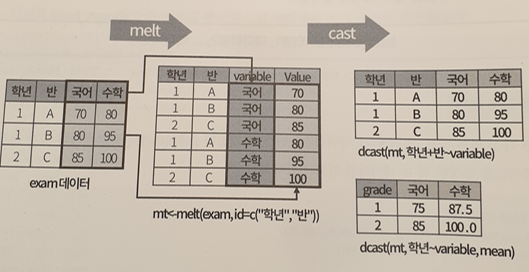

### melt

Q1. R의 airquality는 1973년 5월~9월 동안 뉴욕의 일일 대기 질 측정량에 대한 데이터로, 153개의 행과 6개의 변수로 이루어져있다. 6개의 변수 중 Month(월)과 Day(일)을 식별자로 두고, 나머지 변수와 변수 값은 모두 데이터 내에 포함되는 형태로 변환해보자.  

```  
> melt(airquality, id.vars=c("Month", "Day"), na.rm = T)
```  

In [171]:
airqual = pd.read_csv("/content/drive/MyDrive/학습 자료/airqual.csv")
airqual = airqual.drop(['Unnamed: 0'], axis = 1)
airqual.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [175]:
airqual_melt = pd.melt(airqual, id_vars = ("Month", "Day"))
airqual_melt.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


### dcast  

* cast 함수는 melt 함수로 녹여진 형태의 데이터를 다시 여러 칼럼을 가진 형태로 변환해주는 함수이다. (R) 에서 반환하는 데이터 형태가 데이터 프레임일 경우에는 dcast 함수를 사용하고, 반환할 데이터 형태가 벡터/행렬/배열일 경우 acast를 사용할 수 있다.  

* dcast 함수를 사용하면 melt 함수가 적용된 형태의 데이터를 다시 melt 함수 적용 이전의 데이터 형태로 변환 가능할 수 있고, 앞서 배운 ddply함수와 같이 식별자별 특정 변수의 측정치들에 대한 통계량을 계산할 수도 있다.  

Q1. melt 함수에 대한 예제에서 airquality에 melt를 적용한 데이터를 air_melt에 저장하고, 이 데이터를 다시 원래 airquality와 동일한 형태로 변환해보자.  

```  
> write.csv(airquality, file = "C:/Users/joo/R_Study/airqual.csv")
> air_melt<-melt(airquality, id.vars=c("Month", "Day"), na.rm=T)
> air_dcast<-dcast(air_melt, Month + Day ~ ...)
> head(air_dcast)
  Month Day Ozone Solar.R Wind Temp
1     5   1    41     190  7.4   67
2     5   2    36     118  8.0   72
3     5   3    12     149 12.6   74
4     5   4    18     313 11.5   62
5     5   5    NA      NA 14.3   56
6     5   6    28      NA 14.9   66
```


In [209]:
# 파이썬 
# 하나의 컬럼을 여러 개의 새로운 DataFrame으로 생성함
airqual_melt.pivot(index = None, columns = ['variable'], values = ['value'])

value                   
variable Ozone Solar.R  Temp Wind
0         41.0     NaN   NaN  NaN
1         36.0     NaN   NaN  NaN
2         12.0     NaN   NaN  NaN
3         18.0     NaN   NaN  NaN
4          NaN     NaN   NaN  NaN
..         ...     ...   ...  ...
607        NaN     NaN  70.0  NaN
608        NaN     NaN  77.0  NaN
609        NaN     NaN  75.0  NaN
610        NaN     NaN  76.0  NaN
611        NaN     NaN  68.0  NaN

[612 rows x 4 columns]

## (R) data.table  

* 연산속도가 매우 빨라 크기가 큰 데이터를 처리하거나 탐색하는데 유용하며, 그만큼 자주 사용되는 패키지이다.  
* 데이터 테이블은 데이터 프레임과 동일하게 취급된다.  

Q1. 숫자 1, 2, 3이 저장된 x 변수와 문자 "가", "나", "다"가 저장된 y변수로 이루어진 데이터 테이블을 생성한 뒤, 데이터 타입을 확인해보자.  

```  
> install.packages("data.table")
> library(data.table)
> mydata<-data.table(x=c(1:3), y=c("가", "나", "다"))
> mydata
   x  y
1: 1 가
2: 2 나
3: 3 다

> class(mydata)
[1] "data.table" "data.frame"
```  




# 인용 및 참고문헌  

"ADP 실기 데이터 분석 전문가" 2판, 윤종식, 데이터에듀, 2021
